In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.interactive(False)

In [6]:
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.interactive(False)

data = pd.read_csv('power_test.csv',index_col=0)
target = data['Consumed_active_energy_kW']
fig = plt.figure(figsize=(14,12))
plt.ylim(0,100000)
plt.grid("on")
plt.xlabel("data point")
plt.ylabel("Consumed active energy")
plt.plot(target.values,label="data")
plt.show()

In [0]:
import sys
import os
import csv

csv_file = 'power_test.csv'
key_name  = 'ADB1_CRAC3'
i = 0
j = 0
prev_val = -1 
k = 0 
   
max_val = [20000]

min_val = [2000]
field_num = [49]
increase = True
outfile ='powertest_CRAC3.out.csv'
with open(csv_file) as csv_file, open(outfile,'w') as out_csv:
        csv_reader = csv.reader(csv_file, delimiter=',')
        csv_writer = csv.writer(out_csv,delimiter=',')
        
        for row in csv_reader:
           if i == 0:
               csv_writer.writerow(row)
               i += 1   # skip the first header row
               header_row = row
               for y in field_num:
                   print ('check field %s\n'%row[y])
               continue
           i =  i + 1
           found = False
           
           for column in row:
               #print(column)
               if column==key_name:
                   found = True;
                   j = j +1
                   break

           if found:
                error = False
                y = 0
                for x in field_num:
                   if increase and prev_val != -1 and prev_val > float(row[x]):
                       print ('...not incrasing %d %s at row %d'%(prev_val,row[x],i))
                       print (row)
                       error = True 
                   if max_val and float(row[x]) > max_val[y]:
                       print ('...greater than outliner data at row %d'%i)
                       print (row[x])
                       error = True 
                   if min_val and float(row[x]) < min_val[y]:
                       print ('...less than  outliner data at row %d'%i)
                       print (row)
                       error = True 
                   if error:
                       break
                   
                if not error:
                   csv_writer.writerow(row)  
                   prev_val = max(prev_val,float(row[x]))
                   y = y + 1
                   k = k +1
                
        print('Processed %d  lines found %d line cleaned line %d'%(i,j,k))
       

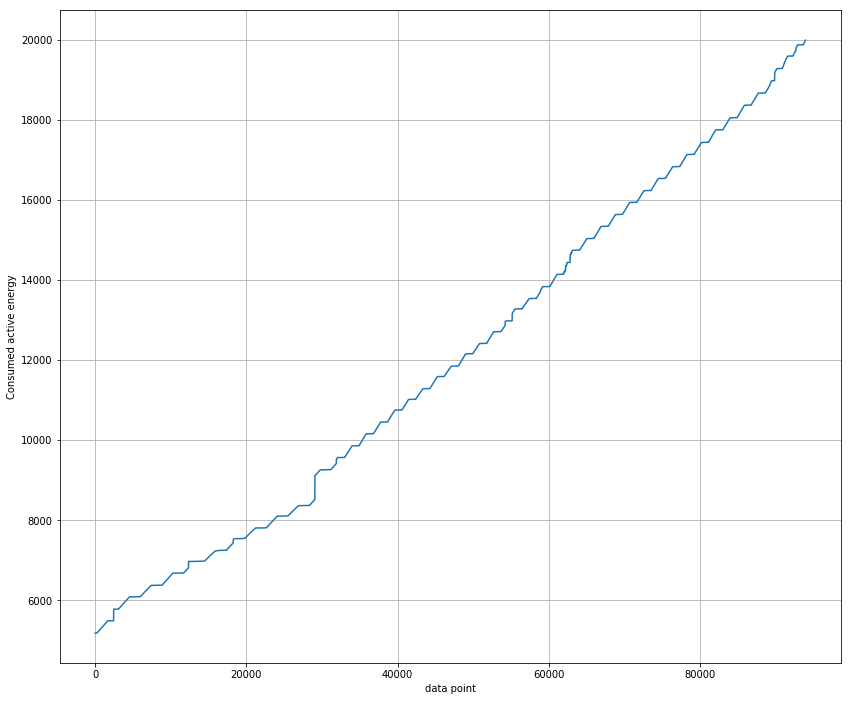

In [7]:
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.interactive(False)
data = pd.read_csv('powertest_CRAC3.out.csv',index_col=0)
target = data['Consumed_active_energy_kW']
fig = plt.figure(figsize=(14,12))
plt.grid("on")
plt.xlabel("data point")
plt.ylabel("Consumed active energy")
plt.plot(target.values,label="data")
plt.show()
    

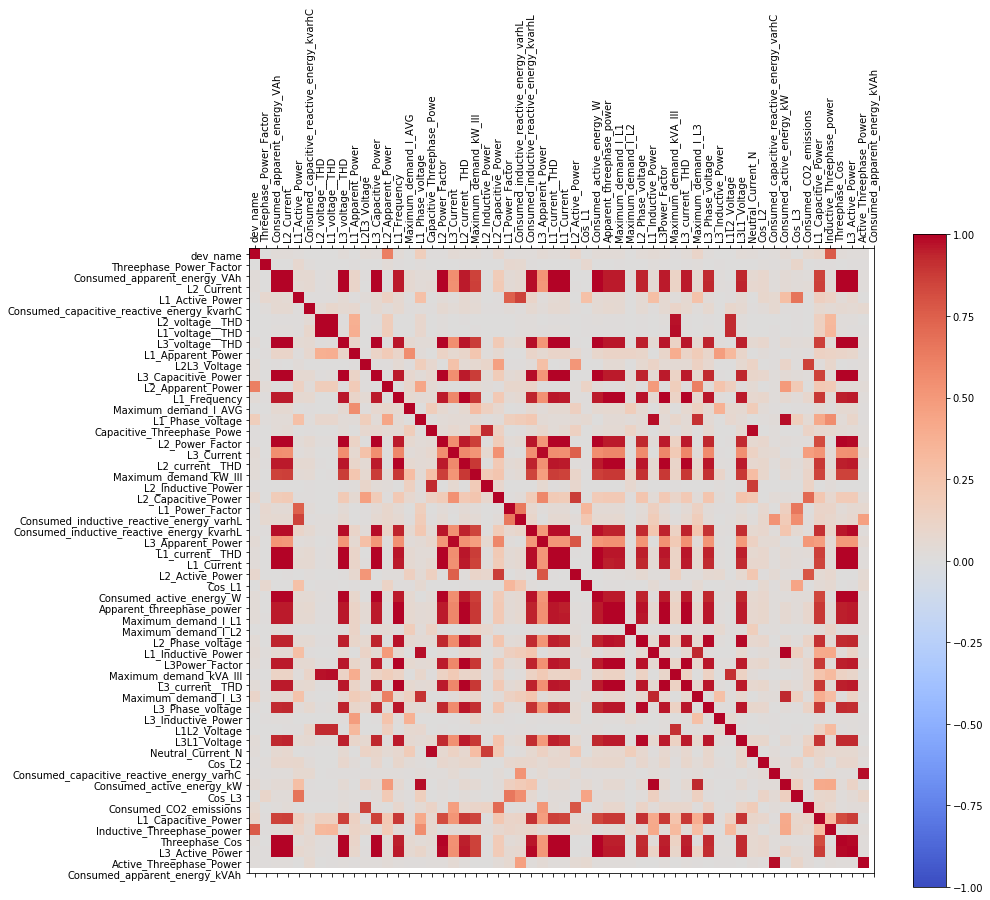

In [5]:
corr = data.corr().abs()
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()
outfile= 'pearson-fig.png'
plt.savefig(outfile)

/ext/sage/sage-8.3_1804/local/lib/python2.7/site-packages/numpy/lib/function_base.py:1931: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
  return a[slice1]-a[slice2]


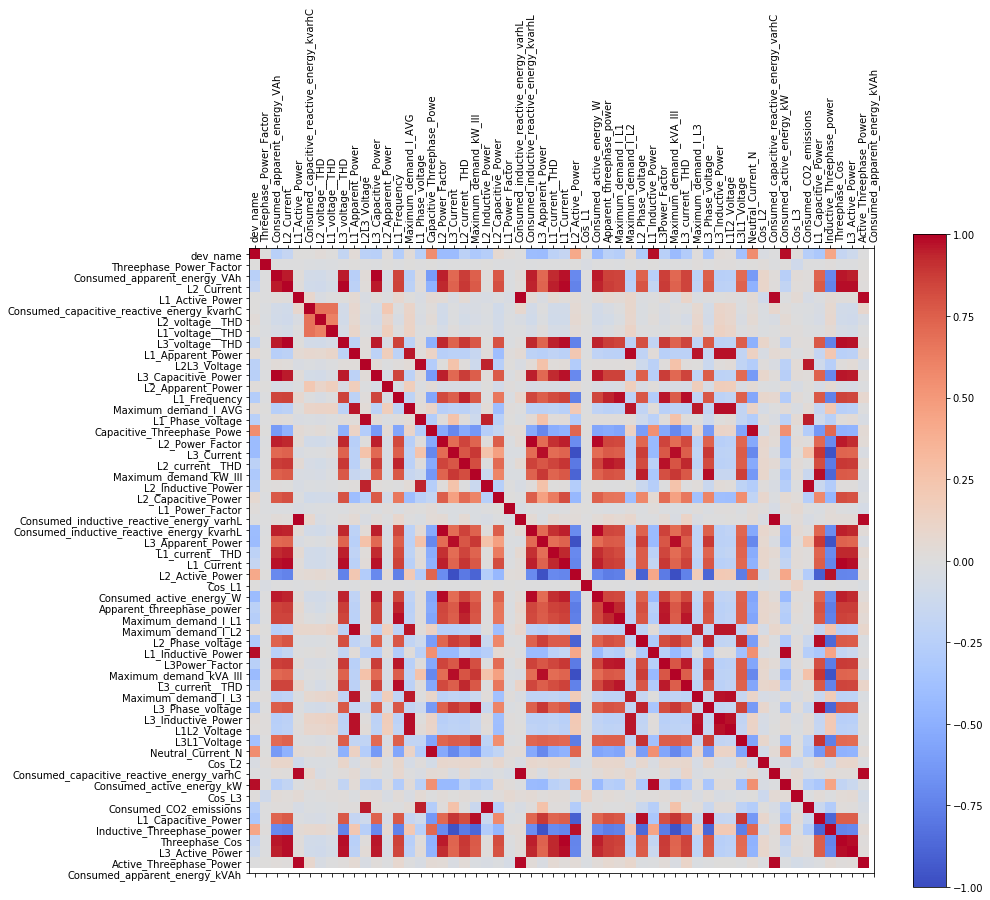

In [6]:
corr = data.corr(method='spearman')
corra = corr.abs()
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()
outfile=  'spearman-fig.png'
plt.savefig(outfile)


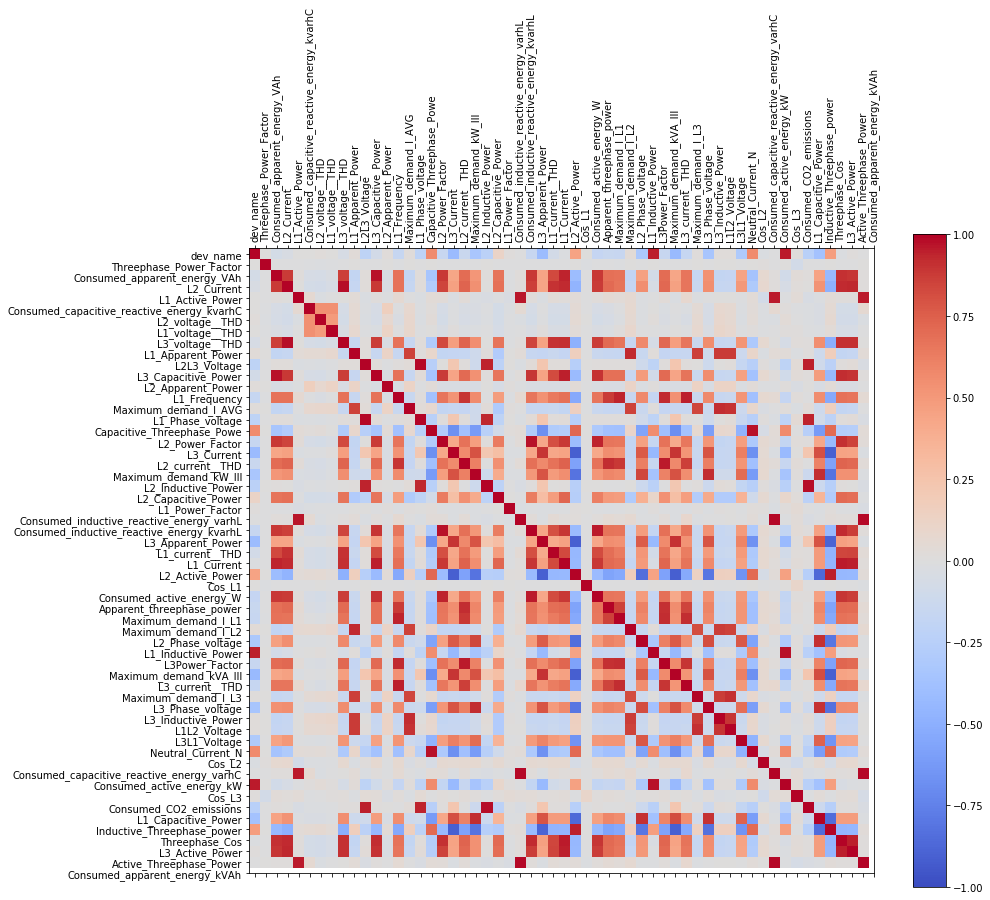

In [7]:
corr = data.corr(method='kendall')
corra = corr.abs()
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()
outfile= 'kendal-fig.png'
plt.savefig(outfile)

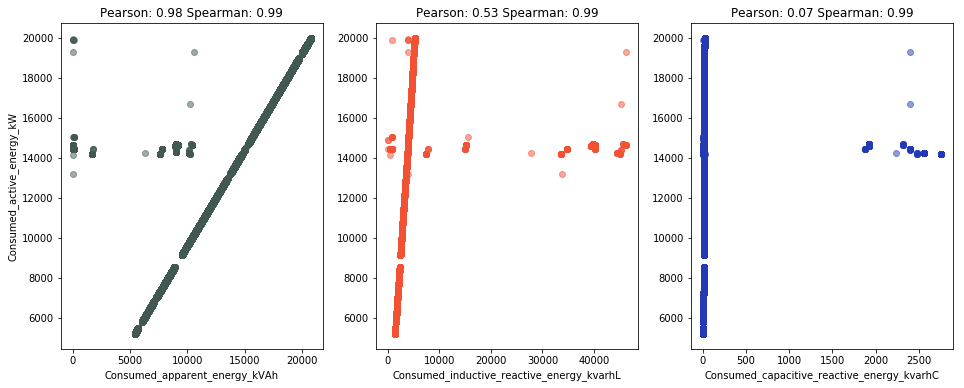

In [8]:
# plot correlated values
plt.rcParams['figure.figsize'] = [16, 6]

fig, ax = plt.subplots(nrows=1, ncols=3)

ax=ax.flatten()

cols = ['Consumed_apparent_energy_kVAh', 'Consumed_inductive_reactive_energy_kvarhL','Consumed_capacitive_reactive_energy_kvarhC']
colors=['#415952', '#f35134', '#243AB5', '#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('Consumed_active_energy_kW')
    i.scatter(data[cols[j]], data['Consumed_active_energy_kW'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    i.set_title('Pearson: %s'%data.corr().loc[cols[j]]['Consumed_active_energy_kW'].round(2)+' Spearman: %s'%data.corr(method='spearman').loc[cols[j]]['Consumed_active_energy_kW'].round(2))
    j+=1

plt.show()

In [2]:
#feature selections

from sklearn import linear_model
def getTopKCorr(data,k):
    corr = data.corr().abs()
    #del data['Consumed_active_energy_kW']
    
    corr_ener = corr['Consumed_active_energy_kW']
    del corr_ener['Consumed_active_energy_kW']
    #print corr_ener.values
    #print corr_ener
    idx = (-corr_ener.values).argsort()[:k]
    print corr_ener[idx]
    return corr_ener[idx].index
    
    

In [8]:
del  data['dev_name']
 
print (data.columns)

#print top 20 features for consumed energy kW
features = getTopKCorr(data,20)
print features

Index([u'Threephase_Power_Factor', u'Consumed_apparent_energy_VAh',
       u'L2_Current', u'L1_Active_Power',
       u'Consumed_capacitive_reactive_energy_kvarhC', u'L2_voltage__THD',
       u'L1_voltage__THD', u'L3_voltage__THD', u'L1_Apparent_Power',
       u'L2L3_Voltage', u'L3_Capacitive_Power', u'L2_Apparent_Power',
       u'L1_Frequency', u'Maximum_demand_I_AVG', u'L1_Phase_voltage',
       u'Capacitive_Threephase_Powe', u'L2_Power_Factor', u'L3_Current',
       u'L2_current__THD', u'Maximum_demand_kW_III', u'L2_Inductive_Power',
       u'L2_Capacitive_Power', u'L1_Power_Factor',
       u'Consumed_inductive_reactive_energy_varhL',
       u'Consumed_inductive_reactive_energy_kvarhL', u'L3_Apparent_Power',
       u'L1_current__THD', u'L1_Current', u'L2_Active_Power', u'Cos_L1',
       u'Consumed_active_energy_W', u'Apparent_threephase_power',
       u'Maximum_demand_I_L1', u'Maximum_demand_I_L2', u'L2_Phase_voltage',
       u'L1_Inductive_Power', u'L3Power_Factor', u'Maximum_demand

Consumed_apparent_energy_kVAh                 0.981747
Consumed_inductive_reactive_energy_kvarhL     0.528266
Consumed_capacitive_reactive_energy_kvarhC    0.068560
L2_voltage__THD                               0.067717
Cos_L1                                        0.052542
L2_current__THD                               0.050298
L1_current__THD                               0.047905
Consumed_CO2_emissions                        0.039708
Consumed_capacitive_reactive_energy_varhC     0.039587
L1_Power_Factor                               0.035377
Threephase_Cos                                0.034699
L1_Capacitive_Power                           0.031062
L3_Phase_voltage                              0.027613
Capacitive_Threephase_Powe                    0.026782
Cos_L2                                        0.026488
Cos_L3                                        0.024519
L3Power_Factor                                0.024410
L3_Apparent_Power                             0.023013
Maximum_de

In [9]:
#select columns with features

data2 = data.iloc[:, [j for j, c in enumerate(data.columns) if c in features ]]


In [12]:
print data2.head

In [10]:
target = data['Consumed_active_energy_kW']
lm = linear_model.LinearRegression()
model = lm.fit(data2,target)

predictions = lm.predict(data2)

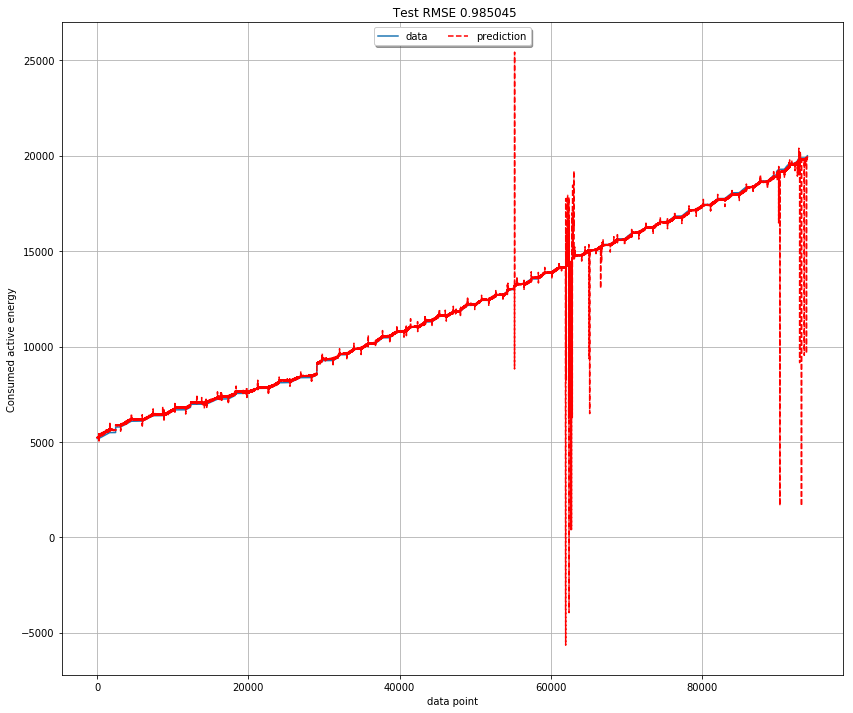

In [11]:
fig = plt.figure(figsize=(14,12))

plt.grid("on")
plt.xlabel("data point")
plt.ylabel("Consumed active energy")
plt.title(" Test RMSE %f"%(lm.score(data2,target)))
plt.plot(target.values,label="data")
plt.plot(predictions, color='red',linestyle='--',label="prediction")
plt.legend(loc='upper center',  shadow=True, ncol=2)

plt.show()

plt.savefig('predict.png')

In [15]:
#with no max limit check

import sys
import os
import csv

csv_file = 'power_test.csv'
key_name  = 'ADB1_CRAC3'
i = 0
j = 0
 
 
outfile ='powertest_CRAC3_nofilter.out.csv'
with open(csv_file) as csv_file, open(outfile,'w') as out_csv:
        csv_reader = csv.reader(csv_file, delimiter=',')
        csv_writer = csv.writer(out_csv,delimiter=',')
        
        for row in csv_reader:
           if i == 0:
               csv_writer.writerow(row)
               i += 1   # skip the first header row
               header_row = row
               for y in field_num:
                   print ('check field %s\n'%row[y])
               continue
           i =  i + 1
           found = False
           
           for column in row:
               #print(column)
               if column==key_name:
                   found = True;
                   j = j +1
                   break

           if found:
                csv_writer.writerow(row)  
                
                 
                
        print('Processed %d  lines found %d line '%(i,j))
       

check field Consumed_active_energy_kW



Processed 393108  lines found 98352 line 


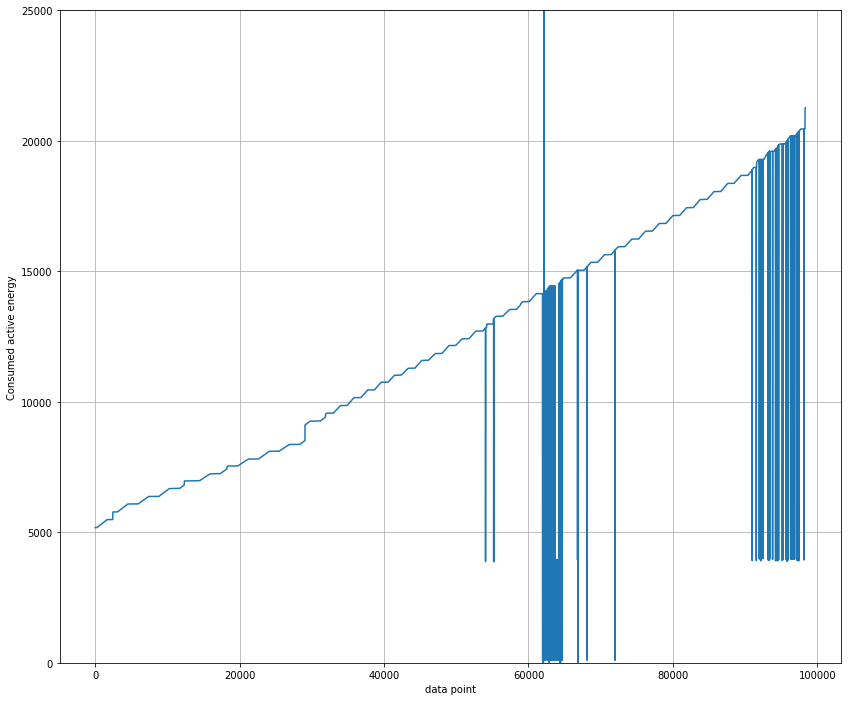

In [24]:
data = pd.read_csv('powertest_CRAC3_nofilter.out.csv',index_col=0)
target = data['Consumed_active_energy_kW']
fig = plt.figure(figsize=(14,12))
plt.ylim(0,25000)
plt.grid("on")
plt.xlabel("data point")
plt.ylabel("Consumed active energy")
plt.plot(target.values,label="data")
plt.show()
    
 

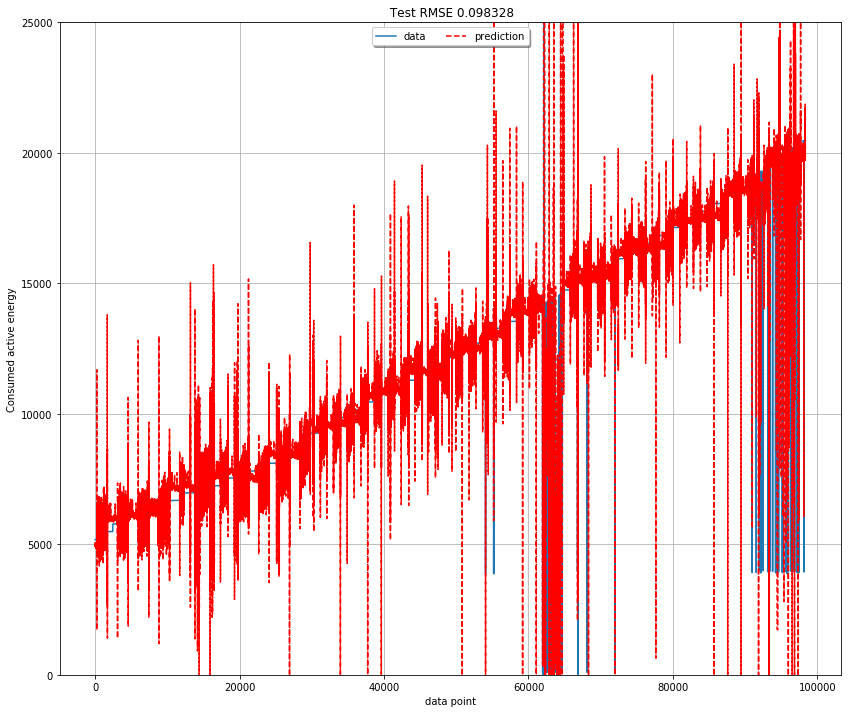

In [25]:
 
del data['Consumed_active_energy_kW']
data2 = data.iloc[:, [j for j, c in enumerate(data.columns) if c in features ]]
lm = linear_model.LinearRegression()
model = lm.fit(data2,target)

predictions = lm.predict(data2)
fig = plt.figure(figsize=(14,12))

plt.grid("on")
plt.xlabel("data point")
plt.ylabel("Consumed active energy")
plt.ylim(0,25000)
plt.title(" Test RMSE %f"%(lm.score(data2,target)))
plt.plot(target.values,label="data")
plt.plot(predictions, color='red',linestyle='--',label="prediction")
plt.legend(loc='upper center',  shadow=True, ncol=2)

plt.show()

plt.savefig('predict_no.png')